# INTRODUCTION 

In this project, I dived into a rich dataset covering various attributes of movies, including name, rating, genre, year, score, votes, country, budget, gross, and more. Through thorough exploratory data analysis (EDA) and visualization, I aimed to uncover insights into the fascinating world of movies.

From analyzing the distribution of genres to exploring trends in budget,Gross over the years, and from investigating the relationship between budget and gross earnings to understanding audience preferences with respect to genre and month of release, this project delves into the diverse facets of the movie industry. By leveraging visualizations like  bar plots,line graphs, pie charts and Heat maps, I sought to bring to light patterns and trends within the dataset.

Through this endeavor, I gained valuable insights into the dynamics of the movie landscape, enhancing my skills in data analysis and visualization. This project serves as a stepping stone for further exploration and understanding of the captivating realm of cinema.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
sns.set_theme('notebook')

In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [315]:
for col in df.columns:
    pct_missing = sum(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [316]:
df=df.fillna('')

In [317]:
for x in df.index:
    if df.loc[x,'budget']=='':
        df.drop(x,inplace=True)

In [318]:
for x in df.index:
    if df.loc[x,'gross']=='':
        df.drop(x,inplace=True)

In [319]:
for col in df.columns:
    pct_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, round(pct_missing)))

name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


In [320]:
df.tail(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0


In [321]:
df=df.reset_index(drop=True)

In [322]:
df.tail(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5431,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
5432,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
5433,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
5434,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
5435,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0


In [323]:
df['month']=df["released"].astype(str).str[:3]
df = df[df['month'].astype(str).str.isalpha()]
df=df.reset_index(drop=True)

In [324]:
df.drop('released',axis=1,inplace=True)

In [325]:
df['rating'] = df['rating'].replace({"Not Rated":"Unrated",
                                                 "PG-13":"PG"})

In [326]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Jun
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Jul
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Jun
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Jul
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Jul


In [327]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df["votes"] = df["votes"].astype("int64")

df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')
df["score"] = df["score"].astype("float")

In [328]:
df2=df['country'].value_counts().head(6)

Text(0.5, 1.0, 'Top ten countries with most movies')

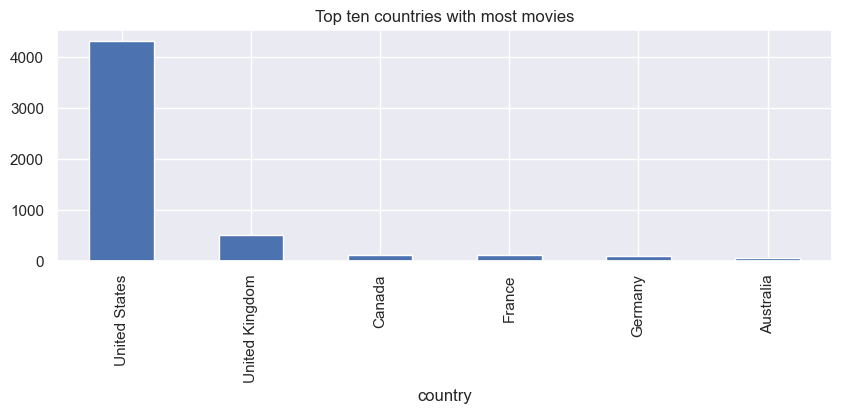

In [329]:

plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
df2.plot(kind='bar')
plt.title('Top ten countries with most movies')

In [330]:
df['rating'].value_counts().head()

rating
PG         2637
R          2595
G           111
Unrated      60
             12
Name: count, dtype: int64

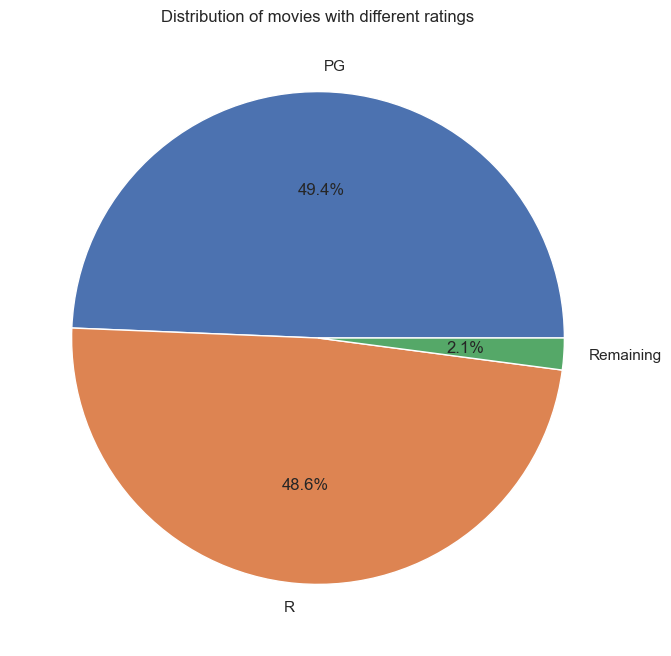

In [331]:
pg= df[df['rating']=='PG']['rating'].value_counts()
r= df[df['rating']=='R']['rating'].value_counts()
remaining=df[(df['rating']!='R') & (df['rating']!='PG')]['rating'].value_counts()
labels = ['PG', 'R','Remaining']
#converting series to list
sizes = [pg.tolist()[0],r.tolist()[0],remaining.tolist()[0]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of movies with different ratings')
plt.show()

In [332]:
df2 = df[df['month'].astype(str).str.isalpha()]
df['genre'].value_counts()

genre
Comedy       1495
Action       1417
Drama         867
Crime         400
Adventure     327
Biography     311
Animation     278
Horror        254
Fantasy        42
Mystery        17
Sci-Fi          6
Thriller        6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

In [333]:
df['month'].value_counts()

month
Oct    522
Aug    517
Nov    496
Dec    452
Mar    450
Jul    447
Jan    446
Sep    439
Jun    429
Apr    423
Feb    419
May    391
Name: count, dtype: int64

In [334]:
#genre vs gross
df_gvg=df.groupby('genre')['gross'].mean().sort_values(ascending=False)
df_gvg.head(4)

genre
Family       5.185831e+08
Animation    2.801246e+08
Action       1.678130e+08
Adventure    1.332682e+08
Name: gross, dtype: float64

Text(0.5, 1.0, 'Averge Gross across each Genre')

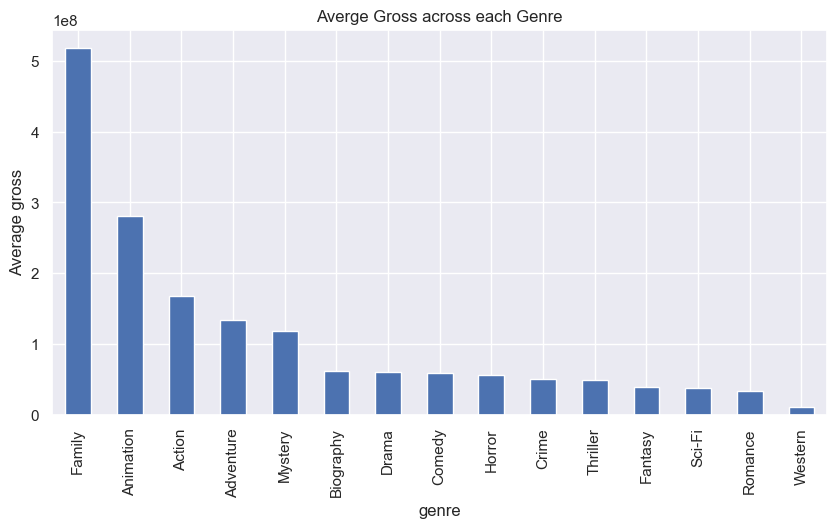

In [335]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
df_gvg.plot(kind='bar')
plt.ylabel('Average gross')
plt.title('Averge Gross across each Genre')

The graph shows the average gross earning for each genre of movie in the dataset. The genres with the highest average gross earning are Family, Animation, and Action. The genres with the lowest average gross earning are Sci-Fi,Romance and Western.

In [336]:
#budget trend for every year
budget=df.groupby('year')['budget'].mean()
budget.head(4)

year
1980    1.156625e+07
1981    1.099841e+07
1982    1.172107e+07
1983    1.069517e+07
Name: budget, dtype: float64

In [337]:
gross=df.groupby('year')['gross'].mean()
gross.head(4)

year
1980    4.429196e+07
1981    2.918663e+07
1982    3.858457e+07
1983    2.796927e+07
Name: gross, dtype: float64

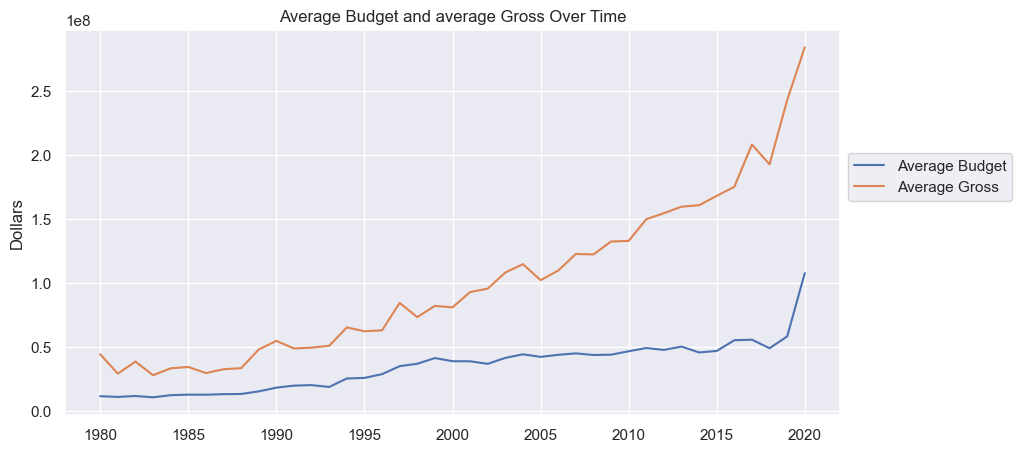

In [360]:
plt.figure(figsize=(10,5))
plt.plot(budget,label='Average Budget')
plt.plot(gross,label='Average Gross')
plt.ylabel('Dollars')
plt.title('Average Budget and average Gross Over Time')
plt.legend(title="", bbox_to_anchor=(1, 0.7))

The line chart showes the increase of average budget for making a move since 1980 due to the varous factor like increasing cost of filmmaking,The desire to create more visually appealing and complex movies and etc

Text(0.5, 1.0, 'Average Gross for Every month')

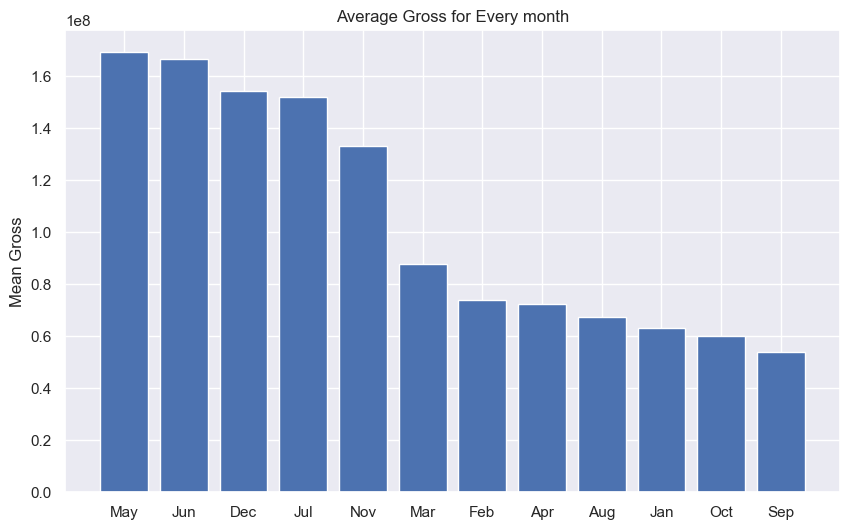

In [339]:
#Average gross for every month
plt.figure(figsize=(10,6))
mon=df.groupby('month')['gross'].mean().sort_values(ascending=False)
plt.bar(mon.index,mon)
plt.ylabel('Mean Gross')
plt.title('Average Gross for Every month')

The Bar plot shows that movies have higher gross during months of December and summer months, this may be because of them being holiday months in general and there may be also a possibilty of producers releases high Budget movies during this season for better gross

Text(0.5, 1.0, 'Mean Score For Every Genre')

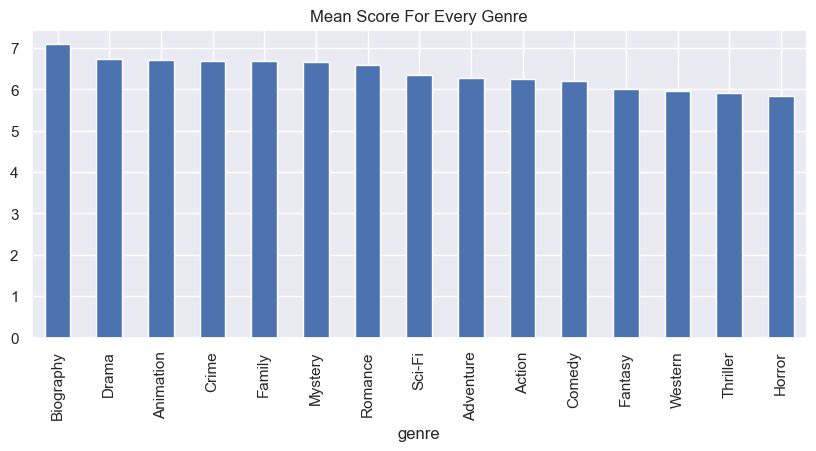

In [340]:
#figuring out relation between genre and score
plt.figure(figsize=(10,4))
df_gvr=df.groupby('genre')['score'].mean().sort_values(ascending=False)
df_gvr.head(4)
plt.xticks(rotation=90)
df_gvr.plot(kind='bar')
plt.title('Mean Score For Every Genre')


In [341]:
df.sort_values(by='gross',ascending=False).head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
3738,Avatar,PG,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dec
5311,Avengers: Endgame,PG,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apr
1798,Titanic,PG,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dec
4738,Star Wars: Episode VII - The Force Awakens,PG,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dec
5167,Avengers: Infinity War,PG,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apr


In [342]:
d=df.groupby('director')['gross'].mean().sort_values(ascending=False)
d2=d.reset_index()
d=d2.head(10)

In [343]:
d['gross'].dtype

dtype('float64')

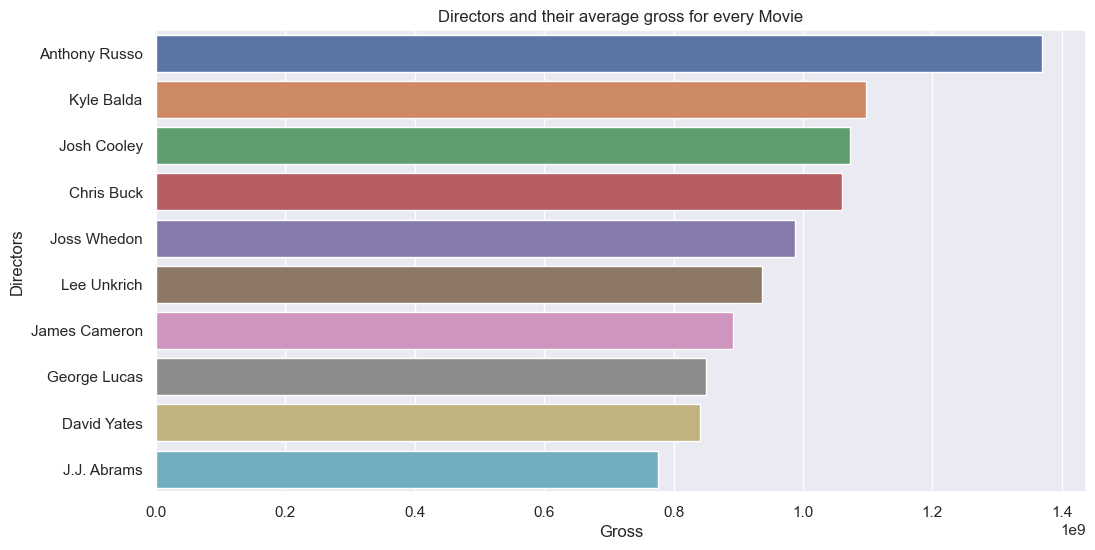

In [344]:
plt.figure(figsize=(12,6))
sns.barplot(y='director',x='gross',data=d)
plt.ylabel('Directors')
plt.xlabel('Gross')
plt.title('Directors and their average gross for every Movie')
plt.show()

From the data it can be generalized that higher budget movies have higher gross and it can be verified by using correlation plots 

Text(0, 0.5, 'budget')

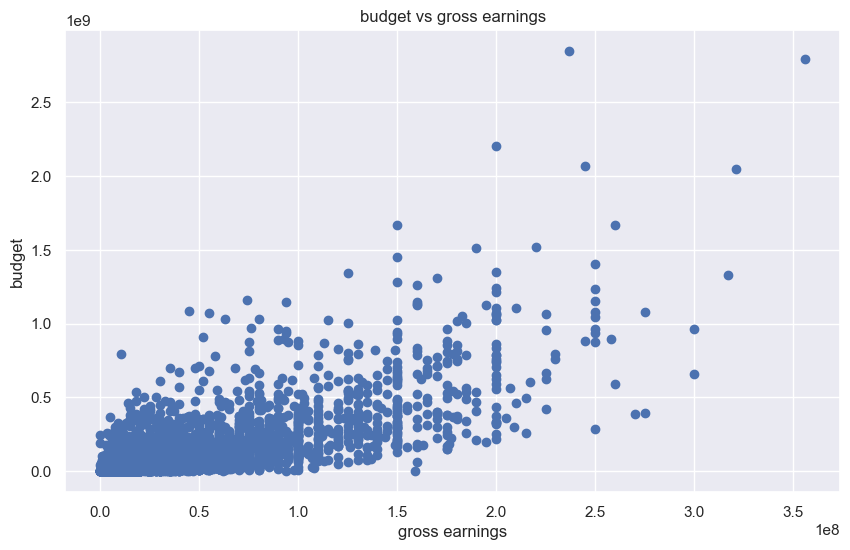

In [345]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('gross earnings')
plt.ylabel('budget')


Text(0.5, 1.0, 'budget vs gross earnings')

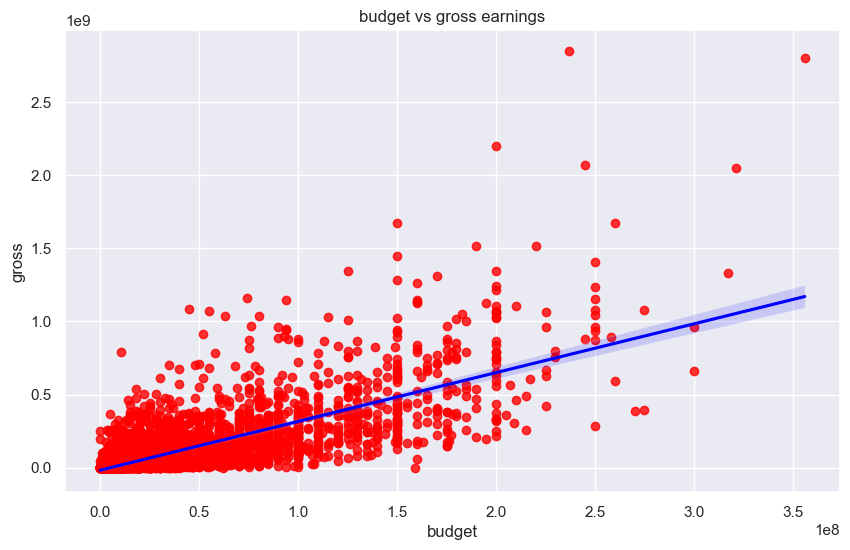

In [346]:
plt.figure(figsize=(10,6))
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('budget vs gross earnings')

In [347]:
 dfc=df.select_dtypes(include='number')

In [348]:
cm=dfc.corr()#pearson,kendall,spearman

In [349]:
cm

,year,score,votes,budget,gross
year,1.000000,0.054916,0.205336,0.327501,0.273963
score,0.054916,1.000000,0.473926,0.071729,0.222138
votes,0.205336,0.473926,1.000000,0.439816,0.614788
budget,0.327501,0.071729,0.439816,1.000000,0.740319
gross,0.273963,0.222138,0.614788,0.740319,1.000000


In [350]:
#high correlation between budget and gross

Text(92.25, 0.5, 'movie features')

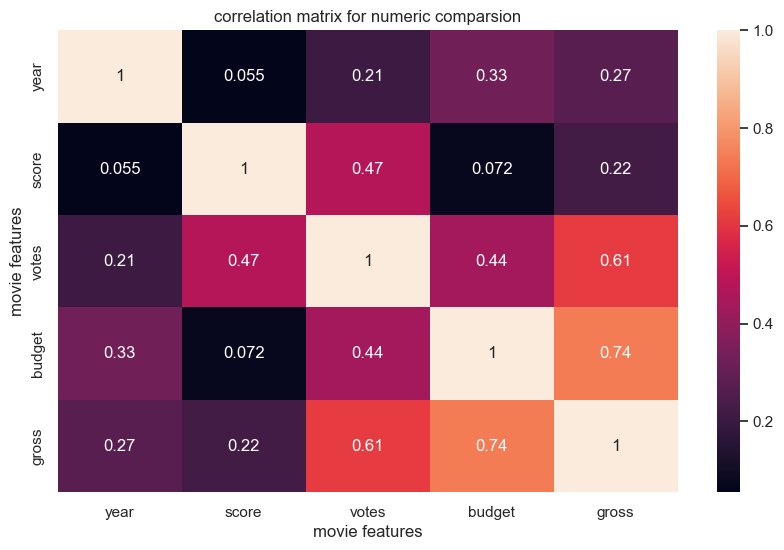

In [351]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.title('correlation matrix for numeric comparsion')
plt.xlabel('movie features')
plt.ylabel('movie features')